# (실습) 케라스와 텐서플로우

## [TensorFlow Playground](https://playground.tensorflow.org)

[TensorFlow Playground](https://playground.tensorflow.org)에서 분류와 회귀 모델의 학습과정을 살펴 보면서 
문제를 해결하는 최선의 모델을 찾고자 한다.
그런 다음에 아래 요소들에 적절한 값이 선택된 이유를 (추정해서) 설명할 수 있어야 한다.

- 특성(features) 선택
- 학습률(learning rate)
- 활성화 함수(activation function)
- 규제(regularization)와 규제율(regularization rate)
- 훈련셋(training set)대 테스트셋(test set) 비율
- 배치 크기(batch size)
- 은닉층(hidden layer)과 유닛(unit 또는 neuron) 수

**모델 A**

아래 그림은 음성 데이터(주황색)와 양성 데이터(파랑색)를 분류하는 목적으로 훈련 시키려 하는 심층 신경망 모델을 보여준다.

- 입력 특성: $\mathrm{x}_1$과 $\mathrm{x}_2$ 두 개
- 은닉층(hidden layer) 2개
    - 첫째 은닉층: 유닛 4개
    - 둘째 은닉층: 유닛 2개
- 출력값 1개: 양성/음성 여부 판단
    
유닛과 유닛을 연결하는 파란선/주황선은 각각 양의 가중치와 음의 가중치 값을 가리킨다.
선의 두께는 가중치의 절댓값에 해당한다.
즉, 두꺼운 선일 수록 해당 가중치가 출력 유닛에 저장되는 값을 계산할 때 기여도가 보다 크다.


<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a07.jpg" style="width:700px;"></div>


위 사진의 모델을 훈련시키면 다음과 같이 결과가 나온다.

- 훈련 에포크: 505
- 학습률: 0.03
- 층에 사용되는 활성화 함수: Tanh
- 평가 지표
    - 테스트셋에 대한 손실값: 0.003
    - 훈련셋에 대한 손실값: 0.001



<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a05.png" style="width:700px;"></div>


**모델 B**

반면에 하나의 은닉층만 사용하면 결과가 다르게 나온다.

- 은닉층(hidden layer) 1개
    - 첫째 은닉층: 유닛 4개
- 훈련 에포크: 511
- 학습률: 0.03
- 층에 사용되는 활성화 함수: Tanh
- 평가 지표
    - 테스트셋에 대한 손실값: 0.016
    - 훈련셋에 대한 손실값: 0.004

즉, 훈련된 모델의 성능(평가지표)가 두 개의 은닉층을 사용하는 모델보다 나쁘다.
특히 테스트셋에 대한 성능이 훈련셋에 대한 성능보다 많이 떨어져서
과대적합(overfitting)이 보다 심하게 발생했다.


<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a04.png" style="width:700px;"></div>


**모델 C**

은닉층을 아래 그림에서처럼 세 개로 늘리면 성능이 두 개의 은닉층을 사용할 때보다 성능이 좀 더 좋아진다.

- 은닉층(hidden layer) 3개
    - 첫째 은닉층: 유닛 4개
    - 둘째 은닉층: 유닛 3개
    - 둘째 은닉층: 유닛 2개
- 훈련 에포크: 234
- 학습률: 0.03
- 층에 사용되는 활성화 함수: Tanh
- 평가 지표
    - 테스트셋에 대한 손실값: 0.001
    - 훈련셋에 대한 손실값: 0.001

에포크가 234로 이전보다 훨씬 빠르게 좋은 분류 모델을 학습시킨다. 
은닉층을 늘린다고 무조건 좋아지는 것은 일반적으로 아니지만 이 경우엔 최선의 결과를 낳았다.


<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a06.png" style="width:700px;"></div>


## 케라스 활용

케라스를 이용하여 앞서 소개한 모델 A, 모델 B, 모델 C를 직접 구성해서
훈련시키고자 한다.
훈련에 사용되는 데이터셋은 아래 코드를 이용하여 생성한다.

In [1]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt

[`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) 함수를 이용하여 모델 학습에 사용될 데이터셋을 생성한다.

- `datasets`: 입력 데이터셋. (2000, 2) 모양의 텐서. 2000개의 데이터 샘플 포함. 양성, 음성 각각 1000개
- `targets`: 타깃 데이터셋. 0과 1로 구성된 (2000,) 모양의 텐서. 0은 음성, 1은 양성.

In [41]:
from sklearn.datasets import make_circles
dataset, targets = make_circles(2000, noise=0.1, factor=0.2)

`dataset`은 (2000, 2) 모양의 텐서다. 
즉, 한 개의 데이터 샘플은 두 개의 특성을 갖는다.

In [42]:
print("모양: ", dataset.shape)
print("첫 5개 데이터:", dataset[:5], sep='\n')

모양:  (2000, 2)
첫 5개 데이터:
[[-1.03048946 -0.22853214]
 [ 0.47449395 -1.01954256]
 [ 0.21373348  0.28551849]
 [ 0.76332902  0.69200086]
 [ 0.61790529 -0.90298142]]


2000개의 샘플의 양성/음성 여부는 (2000, 1) 모양의 `targets` 텐서에 저장되어 있으며
무작위로 지정되어 있다.
예를 들어 첫 5개 샘플의 양성/음성 여부는 다음과 같다.
0은 음성을, 1은 양성을 가리킨다.

In [43]:
print("타겟 모양: ", targets.shape)
print("타겟:", targets[:5], sep='\n')

타겟 모양:  (2000,)
타겟:
[0 0 1 0 0]


양성은 파란색, 음성은 주황색으로 표시한 데이터 산점도는 다음과 같다.

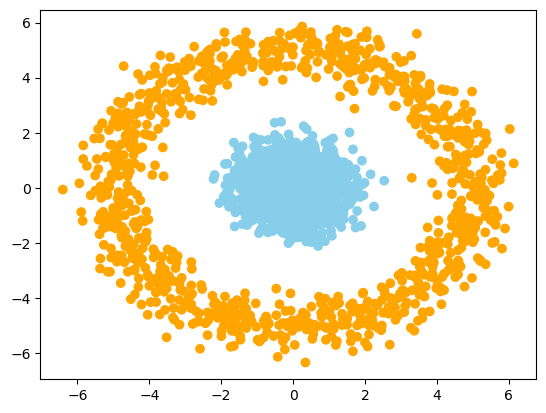

In [45]:

plt.scatter(dataset[:,0]*5, dataset[:,1]*5, c=['orange' if i==0 else 'skyblue' for i in targets])
plt.show()

케라스를 이용하여 모델 A를 구성한 다음에 위 데이터셋을 이용하여 훈련시키고자 한다.
먼저, `targets`의 모양을 다음과 같이 변환시킨다.
이유는 케라스 모델은 타깃 데이터셋도 2차원 텐서를 요구하기 때문이다.

신경망 모델은 데이터 샘플 별로 여러 종류의 값을 동시에 예측한다.
여기서는 데이터 샘플 별로 양성/음성 여부에 대해서만 예측하기 때문에 
한 샘플에 대한 예측값은 길이가 1인 벡터이다.
따라서 타깃셋은 (2000, 1) 모양의 텐서이어야 한다.

In [46]:
targets = targets.reshape(-1,1)
targets

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

모델 A를 신경망 모델로 구성하면 다음과 같다.

In [52]:
from tensorflow import keras
from tensorflow.keras import layers

modelA = keras.Sequential([
    layers.Dense(4, activation="tanh"),   # 첫째 은닉층
    layers.Dense(2, activation="tanh"),   # 둘째 은닉층
    layers.Dense(1, activation="sigmoid") # 출력층
    ])

`modelA` 를 아래 옵션을 이용하여 컴파일한다.

- 옵티마이저: `rmsprop`
- 손실: `binary_crossentropy` (이진 분류 용도의 손실 함수 지정)
- 평가지표: `accuracy` (정확도 평가)

In [53]:
modelA.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

50대 50의 비율로 훈련용 데이터셋과 타깃셋인 `x_train`, `y_train`과 
테스트용 데이터셋과 타깃셋 `x_test`, `y_test`를 지정한다.

In [54]:
x_train, y_train = dataset[:1000], targets[:1000]
x_test, y_test = dataset[1000:], targets[1000:]

모델을 훈련시킨다. 
`fit()` 메서드의 반환값은 훈련이 잘 된 모델의 정보를 담고 있는 `History` 객체이다.

In [55]:
history = modelA.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30


100/100 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.4700
Epoch 2/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.6790
Epoch 3/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.7030
Epoch 4/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.7020
Epoch 5/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.6960
Epoch 6/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.6970
Epoch 7/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6910
Epoch 8/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.6930
Epoch 9/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.7030
Epoch 10/30
100/100 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.7020
Epoch 11/3

`History` 객체는 훈련된 모델의 다양한 정보를 저장한다.
예를 들어 `model` 속성은 훈련된 모델을 저장한다.
아래 코드는 훈련된 모델이 `Sequential` 모델임을 확인해준다.

In [70]:
type(history.model)

keras.src.engine.sequential.Sequential

케라스의 모든 모델은 `keras.Model` 클래스를 상속한다.

In [72]:
isinstance(history.model, keras.Model)

True

따라서 모델에 사용된 층의 구성을 확인기 위해
`Model` 클래스의 인스턴스 메서드인 `summary()` 메서드를 이용한다.

In [68]:
history.model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (10, 4)                   12        
                                                                 
 dense_19 (Dense)            (10, 2)                   10        
                                                                 
 dense_20 (Dense)            (10, 1)                   3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


위 결과가 설명하는 바는 다음과 같다.

- `Layer (type)` 열: 각 층에 사용된 층의 이름과 종류. 이름을 별도로 지정하지 않으면 자동으로 지정된다.
- `Output Shape` 열: 각 층에서 생성되는 출력 텐서의 모양. 
    예를 들어 (10, 4)에서 10은 배치 크기를, 4는 네 개의 유닛 개수. 즉 원래 2개의 특성을 갖는 데이터 샘플 각각을
    4개의 특성을 갖는 데이터 샘플로 변환.
- `Param`: 각 층에서 학습되는 파라미터(가중치와 편향)의 개수. 계산법은 다음과 같음.
    - 첫째 층의 파라미터: `2*4 + 4 = 12`
    - 둘째 층의 파라미터: `4*2 + 2 = 10`
    - 셋째 층의 파라미터: `2*1 + 1 = 3`

기타 요소는 다음과 같다.

- `Toral params`: 파라미터 수의 총합. `12 + 10 + 3 = 25`
- `Trainable params`: 훈련되는 파라미터 수의 총합. `12 + 10 + 3 = 25`
- `Non-trainable params`: 훈련되지 않는 파라미터 수의 총합. `0 + 0 + 0 = 0`. 
    즉, 위 모델은 훈련되지 않는 파라미터 사용하지 않음.


`history.model`이 가리키는 모델과 `modelA` 동일한 모델을 가리킨다.
이유는 `modelA.fit()` 메서드가 실행되는 동안 `modelA`가 훈련되어
가중치 행렬과 편향 벡터가 모델 자체에서 업데이트 되기 때문이다.

실제로 테스테셋의 처음 5개 데이터 샘플에 대한 예측값이 동일함을 아래 코드로 확인할 수 있다.

In [74]:
modelA.predict(x_test[:5])

1/1 [==============================] - 0s 78ms/step


array([[0.0350509 ],
       [0.94828284],
       [0.92921627],
       [0.1926225 ],
       [0.1589742 ]], dtype=float32)

In [75]:
history.model.predict(x_test[:5])

1/1 [==============================] - 0s 17ms/step


array([[0.0350509 ],
       [0.94828284],
       [0.92921627],
       [0.1926225 ],
       [0.1589742 ]], dtype=float32)

`History` 객체의 `params` 인스턴스 속성은 모델을 지정할 때 사용된
하이퍼파라미터를 저장한다.
아래 코드는 30번의 에포크와 스텝의 수를 보여준다.
참고로 스텝은 훈련셋의 크기와 배치크기에 의해 자동 결정된다.
여기서 100인 이유는 훈련셋의 크기가 1000이고 배치 크기가 10 기에
총 `1000/10 = 100` 번의 스텝이 한 번의 에포크 동안 실행된다.

In [64]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 100}

`History` 객체의 `history` 속성은 훈련 과정에서 에포크 단위로 계산된
훈련셋과 검증셋에 대한 손실값(loss)과 평가지표를 저장한 사전 객체를 가리킨다.

여기서는 검증셋은 지정되지 않았고, 평가지표로 정확도(accuracy) 하나만 사용하였기에
훈련셋에 대한 손실값(loss)과 정확도(accuracy)만 에포크 단위로 저장한다.

In [77]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

예를 들어 에포크 별 훈련셋에 대한 손실값의 변화는 다음과 같다.

In [78]:
history.history['loss']

[0.6929258704185486,
 0.6916694045066833,
 0.690117359161377,
 0.6880171895027161,
 0.6850718259811401,
 0.6806982159614563,
 0.6748542189598083,
 0.6680921316146851,
 0.6600195169448853,
 0.650046169757843,
 0.638062059879303,
 0.6237192153930664,
 0.607499361038208,
 0.5881668329238892,
 0.5677407383918762,
 0.5451755523681641,
 0.5225554704666138,
 0.5005300641059875,
 0.478040486574173,
 0.45471155643463135,
 0.4315906763076782,
 0.40780413150787354,
 0.3842318654060364,
 0.3594980537891388,
 0.3355628252029419,
 0.31204596161842346,
 0.2892109453678131,
 0.2676948010921478,
 0.24700751900672913,
 0.2276378571987152]

에포크 별 훈련셋에 대한 정확도의 변화는 다음과 같다.

In [79]:
history.history['accuracy']

[0.4699999988079071,
 0.6790000200271606,
 0.703000009059906,
 0.7020000219345093,
 0.6959999799728394,
 0.6970000267028809,
 0.6909999847412109,
 0.6930000185966492,
 0.703000009059906,
 0.7020000219345093,
 0.7120000123977661,
 0.7070000171661377,
 0.7210000157356262,
 0.7390000224113464,
 0.781000018119812,
 0.8349999785423279,
 0.8830000162124634,
 0.9179999828338623,
 0.9430000185966492,
 0.9660000205039978,
 0.9850000143051147,
 0.9919999837875366,
 0.9950000047683716,
 0.9980000257492065,
 0.9980000257492065,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033,
 0.9990000128746033]

**문제 2**

아래 설정을 변경하면서 최고 성능의 하이퍼파라미터 조합을 확인하라.

- 층과 유닛의 개수
- 훈련셋과 테스트셋의 비율
- 배치 크기
- 학습률
- 규제와 규제율
- 활성화 함수
- 에포크

## 텐서플로우 활용

아래 코드는 순수 텐서플로우를 이용하여 이진분류 문제를 해결하는 코드이다.

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터셋 크기
num_samples_per_class = 1000

# 음성 데이터셋
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

# 양성 데이터셋
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

# 입력 및 타깃 데이터셋
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

# 가중치와 편향        
input_dim = 2     # 입력 샘플의 특성이 2개
output_dim = 1    # 하나의 값으로 출력

# 가중치: 무작위 초기화
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

# 편향: 0으로 초기화
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# 모델 지정(하나의 층 사용)
def model(inputs):
    return tf.matmul(inputs, W) + b

# 손실함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# 학습률
learning_rate = 0.1

# 훈련 스텝
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# 모델 학습
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.9927
Loss at step 1: 0.1929
Loss at step 2: 0.1130
Loss at step 3: 0.0973
Loss at step 4: 0.0898
Loss at step 5: 0.0839
Loss at step 6: 0.0787
Loss at step 7: 0.0739
Loss at step 8: 0.0695
Loss at step 9: 0.0655
Loss at step 10: 0.0619
Loss at step 11: 0.0586
Loss at step 12: 0.0556
Loss at step 13: 0.0529
Loss at step 14: 0.0504
Loss at step 15: 0.0481
Loss at step 16: 0.0461
Loss at step 17: 0.0442
Loss at step 18: 0.0425
Loss at step 19: 0.0409
Loss at step 20: 0.0395
Loss at step 21: 0.0382
Loss at step 22: 0.0370
Loss at step 23: 0.0359
Loss at step 24: 0.0350
Loss at step 25: 0.0341
Loss at step 26: 0.0333
Loss at step 27: 0.0325
Loss at step 28: 0.0318
Loss at step 29: 0.0312
Loss at step 30: 0.0307
Loss at step 31: 0.0302
Loss at step 32: 0.0297
Loss at step 33: 0.0293
Loss at step 34: 0.0289
Loss at step 35: 0.0285
Loss at step 36: 0.0282
Loss at step 37: 0.0279
Loss at step 38: 0.0277
Loss at step 39: 0.0274


위 코드의 실행결과는 다음과 같이 이진분류 모델이다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/HighResolutionFigures/figure_3-8.png" style="width:500px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**문제 1**

위 코드는 학습과정에서 전체 데이터셋을 하나의 배치로 사용한다.
미니배치 학습을 지원하도록 코드를 수정한 후에 훈련을 진행하여 최선의 모델을 구현하라.
배치 크기는 32로 한다.

**문제 2**

`metrics`로 예측 정확도를 훈련 과정 중에 측정하는 기능을 추가하라. 

**문제 3**

위 코드는 입력값에서 바로 출력값을 계산한다. 
순전파에서 네 개의 유닛으로 구성된 층(layer)을 통과하도록 모델을 수정한 모델을 훈련시켜서
최선의 모델을 구현하라.
단, 미니 배치와 정확도를 측정하는 기능도 함께 사용한다.

힌트: [저수준 선형 분류 신경망](https://colab.research.google.com/github/codingalzi/dlp2/blob/master/excs/exc-keras_and_tf-example.ipynb)